# Example: REV analysis for porosity

This example shows the functionality of REVAnalyzer library and the structure of output for scalar metric REV
analysis taking porosity as the example. 

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import Porosity

[13:43:05] ERROR    PARDISO solver not installed, run `pip install           ]8;id=1730976185.0137525-172189;file:///home/azubov/miniconda3/lib/python3.9/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:56
                    pypardiso`. Otherwise, simulations will be slow. Apple M                 
                    chips not supported.

In [2]:
#initialization.

n_threads = 32 #number of threads
metric = Porosity(n_threads = n_threads) #metric to be analyzed

image = 'ceramic300' #binary file of 'uint8' type representing 3D image. 
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'
 
analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

![Subsamples selection for dREV and sREV analysis. i is the index of the subsamples selection step.](fig_subsamples.png)

Let we consider 3D box sample of size $\boldsymbol{L}$ = ($L_x$, $L_y$, $L_z$), then the only driving parameter for subsample selection is the increment step of subsample size $\boldsymbol{\Delta L}$ = ($\Delta L_x$, $\Delta L_y$, $\Delta L_z$). We take $N$ selection steps, so $\boldsymbol{\Delta L} = \boldsymbol{L}/N$. We select a set of growing subsamples SC$_k(i)$ from the center and all the corners of the sample, as it is shown in a figure above. Then the size of subsample SC$_k(i)$ $\boldsymbol{L_i} = i \boldsymbol{\Delta L}$, $i$ = 1,2..,$N$.

One can estimate mean linear size of subsample SC$_k(i)$ as geometric mean of its size coordinates:
$\bar{L}_i = (L_{ix}L_{iy}L_{iz})^{1/3}$.

The reliable sREV analysis is possible only if subsamples do not overlap or their overlap is limited. Therefore, we introduce the $N_{sREV}$ parameter. For  $i \le N_{sREV}$, we cut from the considered sample all 9 subsamples SC$_k(i)$ with $k $= 0,1,.,8. For $i > N_{sREV}$, only the center subsamples SC$_0(i)$ are cut.

In [3]:
#list of all considered subsamples linear sizes
analyzer.cut_sizes

[[50, 50, 50],
 [100, 100, 100],
 [150, 150, 150],
 [200, 200, 200],
 [250, 250, 250]]

In [4]:
#list of mean subsamples linear sizes at all the selection steps
analyzer.geom_mean_cut_sizes

[50, 100, 150, 200, 250, 300]

In [5]:
#generate metric data for all the subsamples
analyzer.generate()

In [6]:
#the results of generation are available in the subdirectory which is created in output directory:
analyzer._outputdir_cut_values 

'output/ceramic300/Porosity/cuts_values'

In [7]:
#one can read the metric value from the specific subsample:
step = 3
cut_id = 5
value = analyzer.read(step, cut_id)
print(value)

0.3891798518518519


In [8]:
#to get sREV and dREV sizes one should fix correponding thresholds. Then we can analyze the generated data.
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

For the estimation of sREV size for scalar metric S, we first calculate its values $S_{ik}$ for the subsamples SC$_k$($i$), and then obtain mean value $\bar{S_i}$, standard deviation $\sigma_i$ and, finally, use the following formula:

$m: \forall i \ge m$, $\sigma_{norm}(i) = \sigma_i/ \bar{S_i} < \varepsilon_{sREV}$ (sREV_size_1), 

where $\varepsilon_{sREV}$ is sREV threshold.

For the estimation of dREV size we use two different formulas:

$m: \forall i \ge m$, $\delta_1(i) = |2(\bar{S_i} - \bar{S}_{i+1})/(\bar{S_i} + \bar{S}_{i+1})| < \varepsilon_{dREV}$ (dREV_size_1),

and

$m: \forall i \ge m$, $\delta_2(i) = |2(\bar{S_i} - S_0)/(\bar{S_i} + S_0)| < \varepsilon_{dREV}$ (dREV_size_2),

where $S_0$ is the metirc value for the uncut analyzed image and $\varepsilon_{dREV}$ is dREV threshold. 

In [9]:
#mean metric values are presented as dictionary with keys equal to selection step and values equal to metric
#mean values
analyzer.metric_mean

{1: 0.4007466666666667,
 2: 0.389232,
 3: 0.39156401646090533,
 4: 0.3935402361111111,
 5: 0.383722816,
 6: 0.39089988888888894}

In [10]:
#standard veviations of metric values are presented as dictionary with keys equal to selection step and 
#values equal to metric std values
analyzer.metric_std

{1: 0.04960495946531511,
 2: 0.01601985914766767,
 3: 0.006718899762757408,
 4: 0.0043832751514850665}

In [11]:
#normed standard veviations of metric values are presented as dictionary with keys equal to to selection step and 
#values equal to metric normed std values (\sigma_{norm} in Eq. (sREV_size_1))
analyzer.metric_normed_std

{1: 0.12378134016165268,
 2: 0.04115761075057464,
 3: 0.017159134854844965,
 4: 0.011138060989137345}

In [12]:
analyzer.sREV_size_1

50

In [13]:
analyzer.dREV_size_1

50

In [14]:
analyzer.dREV_size_2

50

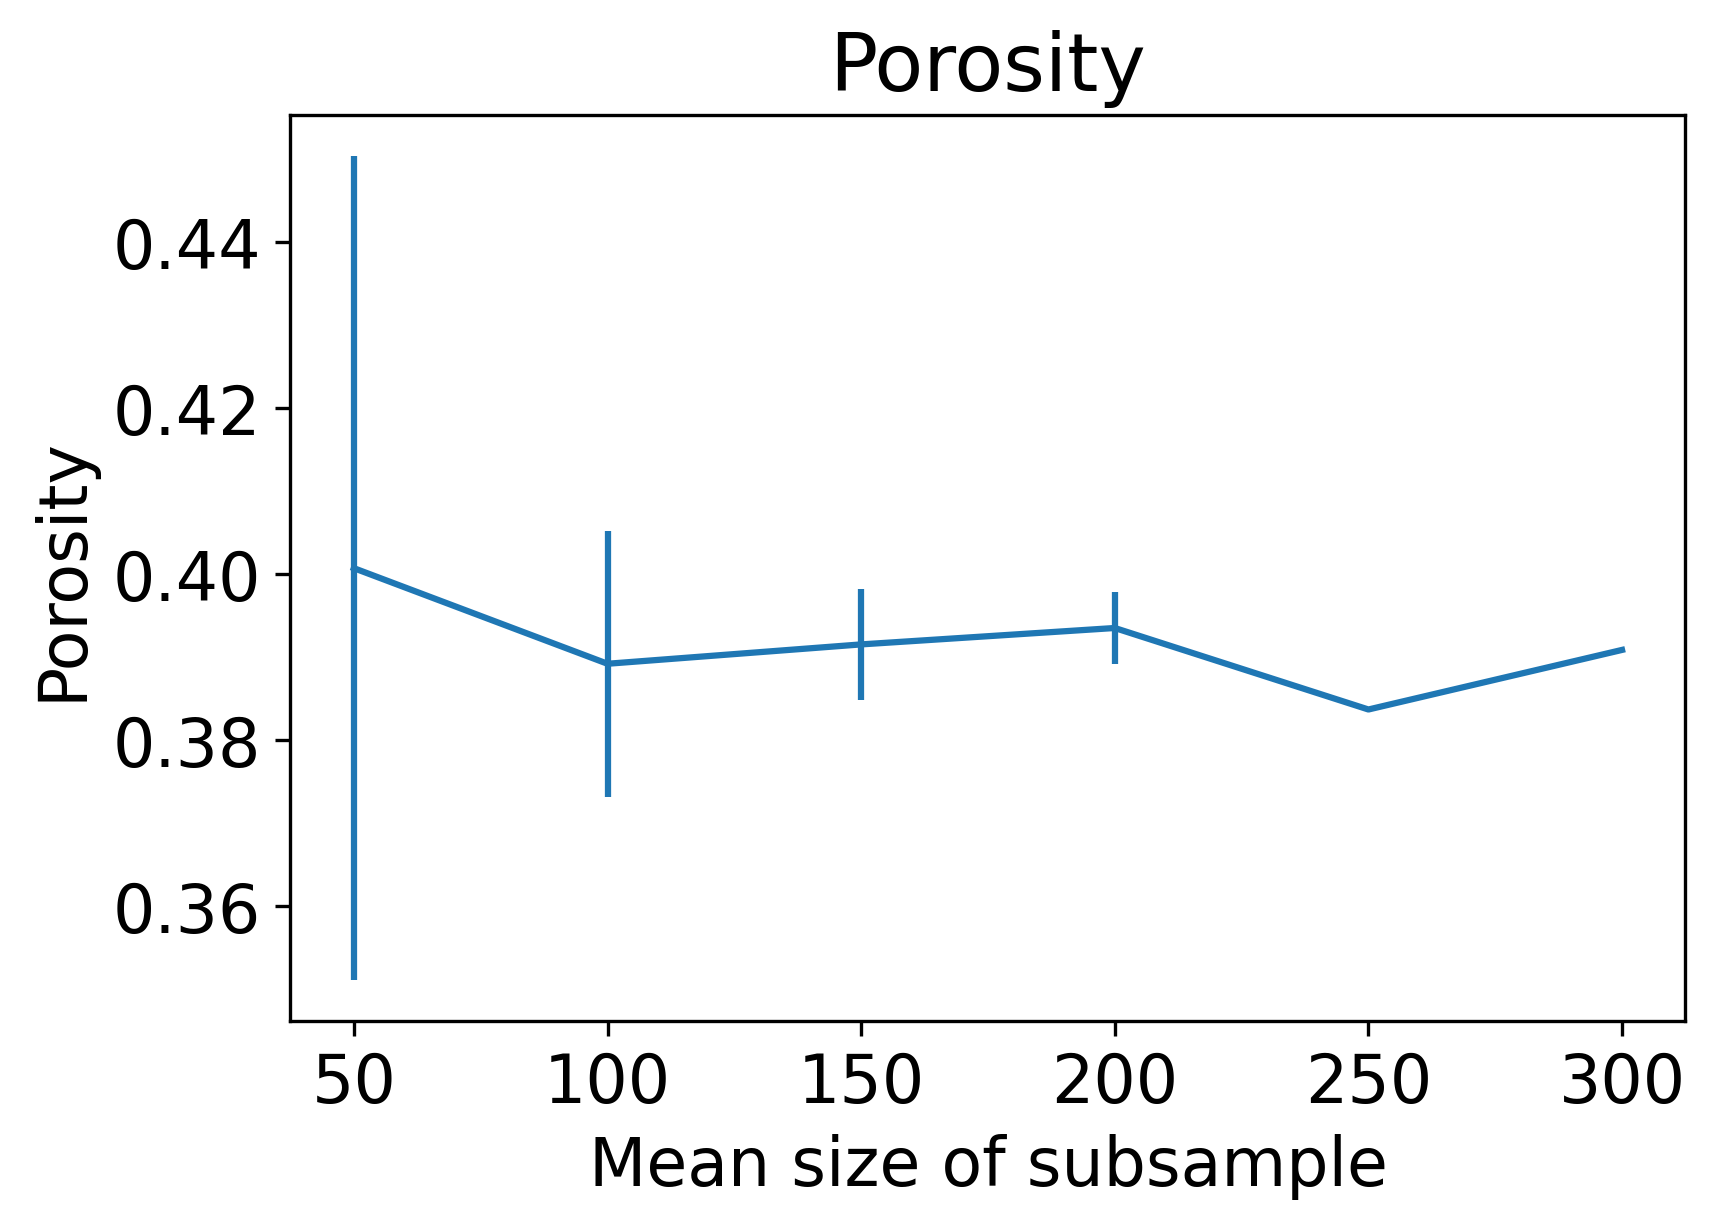

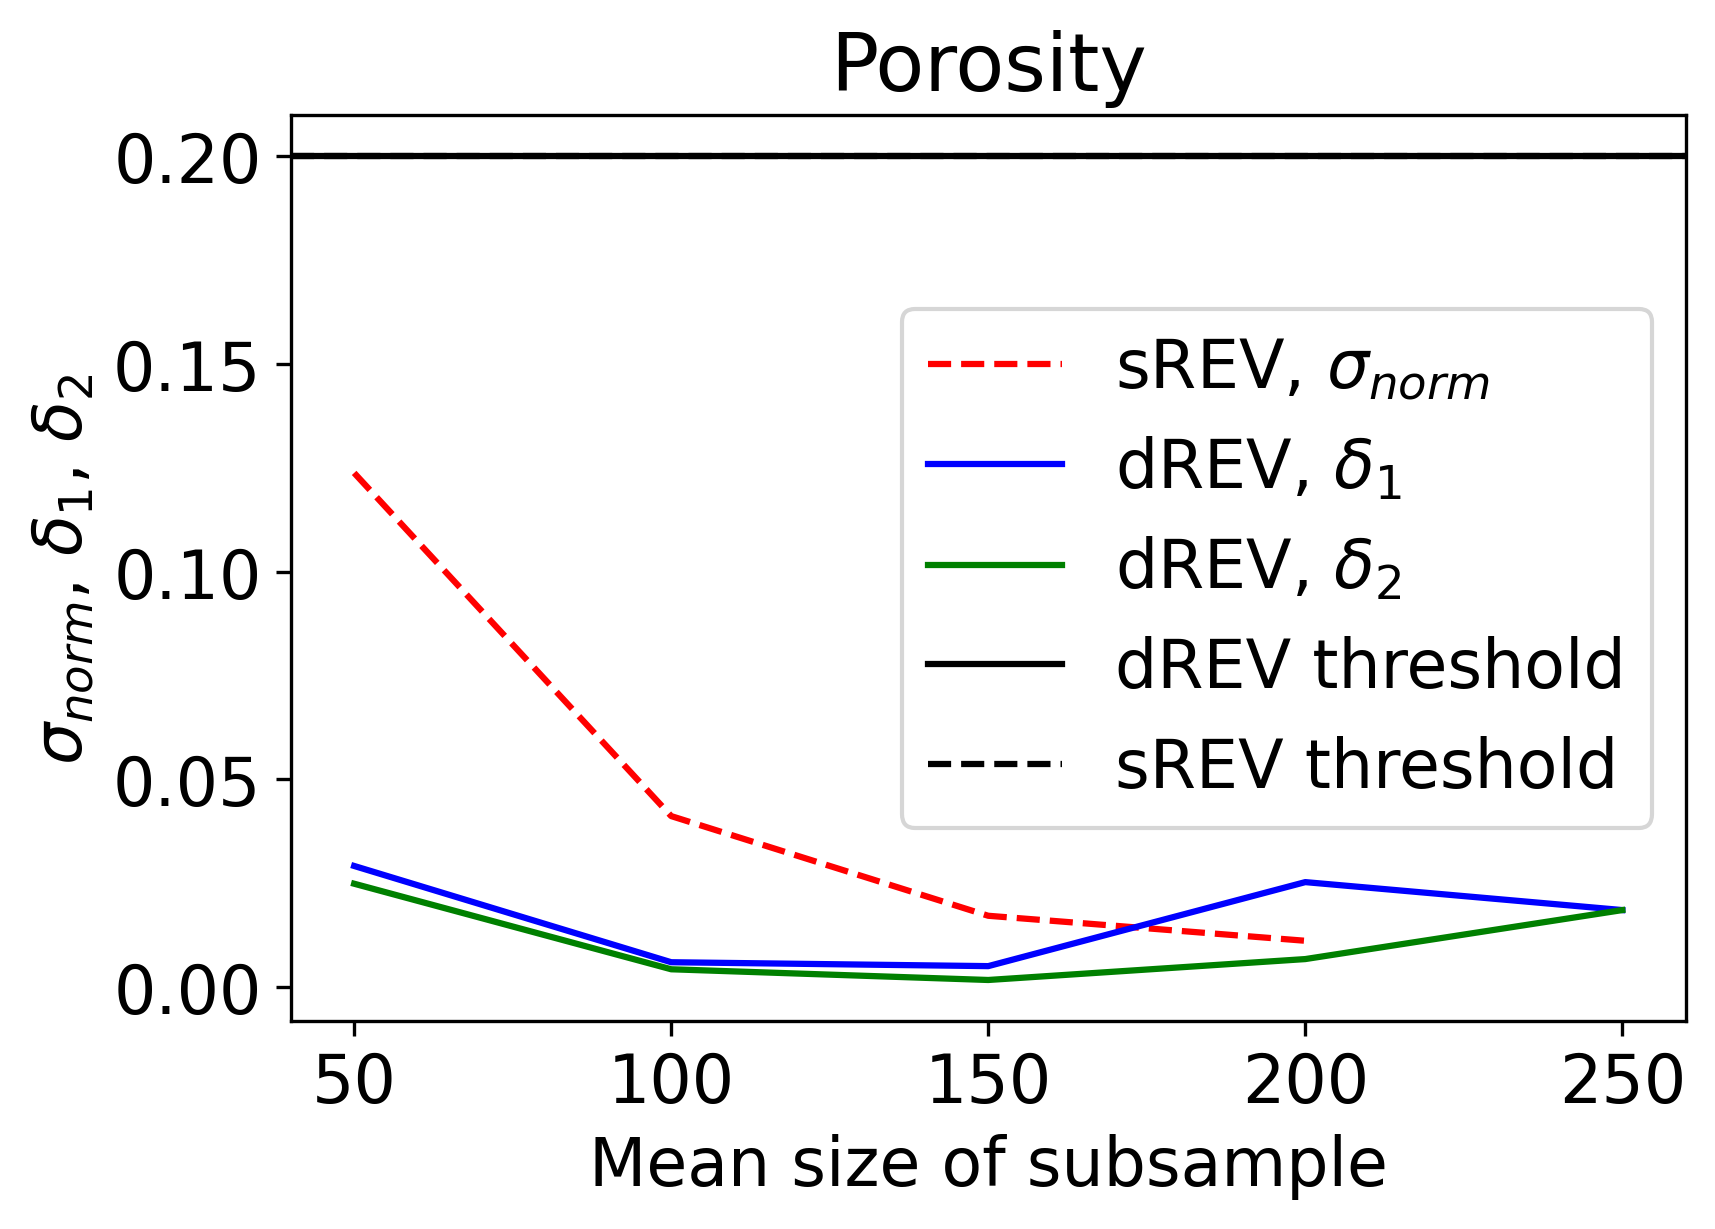

In [15]:
#the results of REV analysis can be visualized. The first figure presents mean and std metric values (as errorbars)
#as the function of subsample linear size. The second one - the dependeces of \delta_1, \delta_2 and \sigma_{norm}
#calculated as in Eqs. above. One can visually estimate dREV and sREV sizes from this figure, as well.
analyzer.show_results()